In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

Jalur 1: A-> C-> F | Total bobot: 13
Jalur 2: A-> B-> D-> E-> F | Total bobot: 12
Jalur 3: A-> B-> D-> E-> C-> F | Total bobot: 25


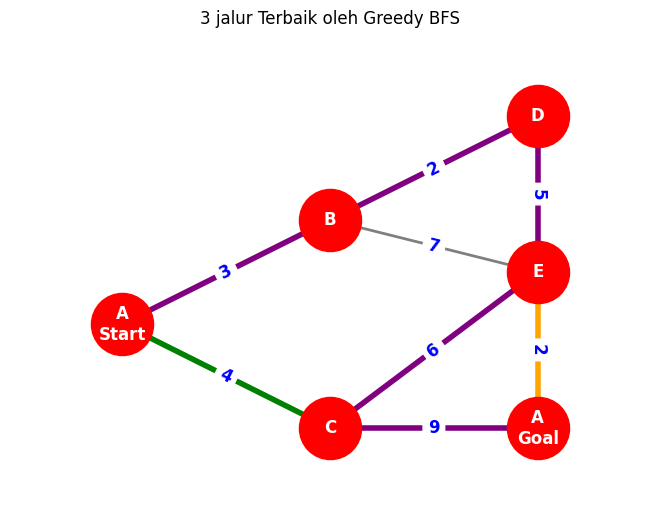

In [9]:
def show_graph_multiple_paths(G, pos, labels, paths, colors):
    edge_labels = nx.get_edge_attributes(G,"weight")
    edge_colors = []
    edge_widths = []

    all_path_edges= []
    for path in paths:
        path_edges = list(zip(path, path[1:]))
        all_path_edges.append(path_edges)

    edge_color_map = {}
    for path_edges, color in zip(all_path_edges, colors):
        for edge in path_edges:
            edge_color_map[edge] = color
            edge_color_map[(edge[1], edge[0])] = color

    for edge in G.edges():
        if edge in edge_color_map:
            edge_colors.append(edge_color_map[edge])
            edge_widths.append(4)
        else:
            edge_colors.append("gray")
            edge_widths.append(2)

    nx.draw(
        G,
        pos,
        with_labels=True,
        labels = labels,
        node_color = "red",
        node_size = 2000,
        font_color = "white",
        font_weight = "bold",
        edge_color = edge_colors,
        width = edge_widths,
    )

    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color="blue",
        font_weight="bold",
        font_size=12,
    )

    plt.title("3 jalur Terbaik oleh Greedy BFS")
    plt.margins(0.2)
    plt.show()

pos = {
    "A": (0,1),
    "B": (1,2),
    "C": (1,0),
    "D": (2,3),
    "E": (2,1.5),
    "F": (2,0),
}

G = nx.Graph()
edges = [
    ("A", "B", 3), ("A", "C", 4),
    ("B", "D", 2), ("B", "E", 7),
    ("C", "E", 6), ("C", "F", 9),
    ("E", "D", 5), ("E", "F", 2),
]

G.add_weighted_edges_from(edges)

labels = {node: node for node in G.nodes()}
labels["A"] = "A\nStart"
labels["F"] = "A\nGoal"

def heuristic(n):
    h = {
        "A": 10,
        "B": 2,
        "C": 3,
        "D": 1,
        "E": 4,
        "F": 0,
    }
    return h[n]

def greedy_bfs_top_k(graph, start, goal, k=3):
    queue = []
    heapq.heappush(queue, (heuristic(start), start, [start]))
    found_paths = []

    while queue and len(found_paths) < k:
        h_val, current, path = heapq.heappop(queue)

        if current == goal:
            found_paths.append(path)
            continue

        for neighbor in graph.neighbors(current):
            if neighbor not in path:
                heapq.heappush(queue, (heuristic(neighbor), neighbor, path + [neighbor]))

    return found_paths

top_paths = greedy_bfs_top_k(G, "A", "F", k=3)

colors = ["green", "orange", "purple"]
for i, path in enumerate(top_paths, 1):
    total_weight = sum(G[u][v]["weight"] for u,v in zip(path, path[1:]))
    print(f"Jalur {i}: {'-> '.join(path)} | Total bobot: {total_weight}")

show_graph_multiple_paths(G, pos, labels, top_paths, colors)

Fungsi show_graph_multiple_paths bertujuan untuk memvisualisasikan sebuah graf beserta beberapa jalur (paths) terbaik yang telah ditemukan oleh algoritma pencarian. Fungsi ini menerima lima parameter: graf G, posisi simpul pos, label simpul labels, daftar jalur paths, dan daftar warna colors yang akan digunakan untuk membedakan tiap jalur. Pertama, fungsi mengambil atribut bobot dari setiap sisi (edge) graf, lalu menyiapkan daftar warna dan ketebalan sisi yang akan digunakan pada proses visualisasi. Selanjutnya, fungsi menyusun daftar sisi-sisi dari setiap jalur dan memetakan setiap sisi pada warna yang sesuai, termasuk kedua arah karena graf tidak berarah. Dalam proses pewarnaan, sisi yang termasuk dalam salah satu jalur akan diberi warna tertentu dan ketebalan lebih besar, sementara sisi lain diberi warna abu-abu dengan ketebalan standar. Fungsi kemudian menggambar graf menggunakan networkx, termasuk simpul, sisi, dan label bobot sisi. Judul grafik ditambahkan sebagai "3 jalur Terbaik oleh Greedy BFS", dan hasil visualisasi ditampilkan dengan plt.show().

Fungsi greedy_bfs_top_k sendiri merupakan implementasi pencarian jalur menggunakan pendekatan Greedy Best-First Search, dengan tujuan menemukan k jalur terbaik dari simpul awal ke simpul tujuan berdasarkan nilai heuristik. Fungsi memanfaatkan heapq untuk mengatur antrean prioritas berdasarkan nilai heuristik, dan menyimpan jalur yang ditemukan hingga mencapai jumlah k. Hasil dari fungsi ini adalah daftar k jalur yang kemudian divisualisasikan menggunakan show_graph_multiple_paths. Visualisasi memperjelas perbedaan antar jalur terbaik dengan warna berbeda untuk membantu analisis jalur dalam graf.

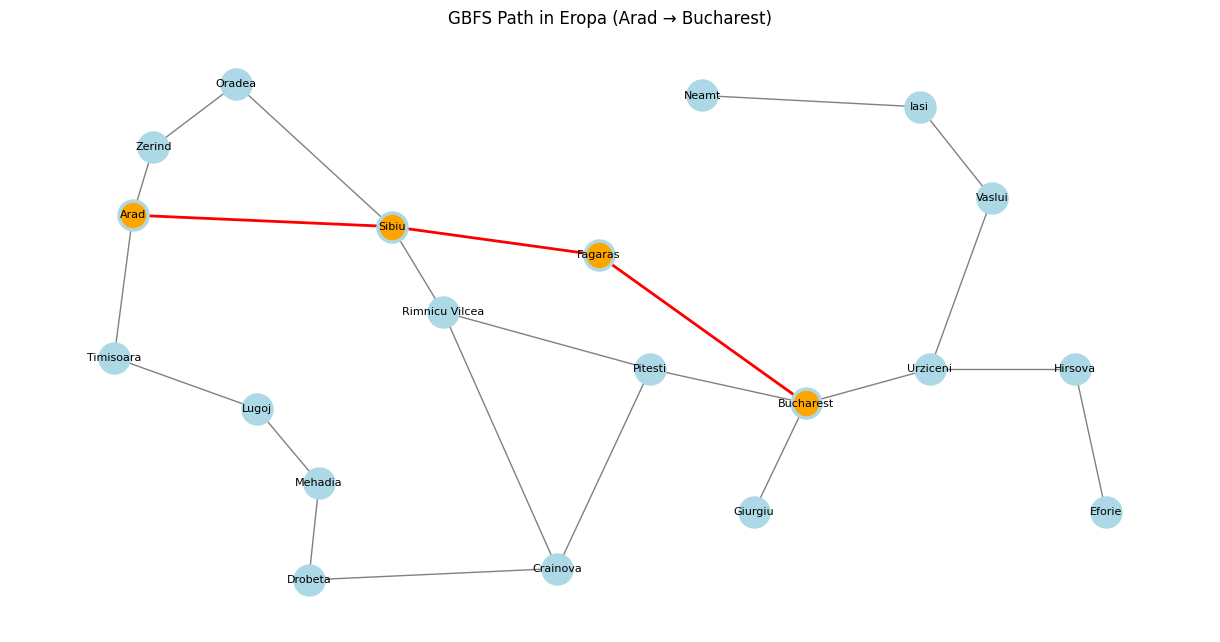

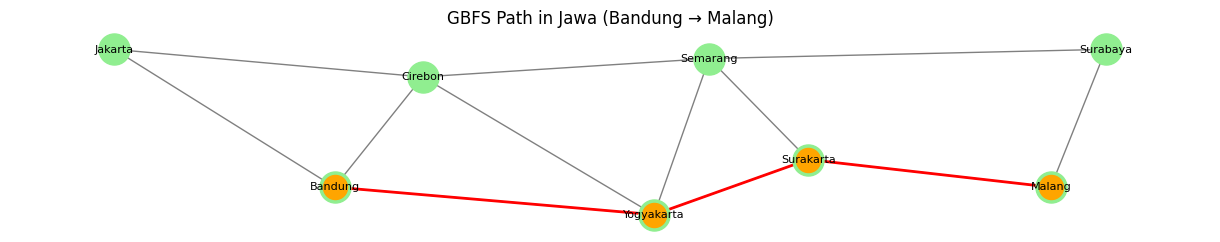

Path Eropa (Arad -> Bucharest): ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Path Jawa (Bandung -> Malang): ['Bandung', 'Yogyakarta', 'Surakarta', 'Malang']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt
from queue import PriorityQueue

eropa_positions = {
    'Oradea': (0.15, 0.95), 'Zerind': (0.07, 0.84), 'Arad': (0.05, 0.72),
    'Sibiu': (0.3, 0.7), 'Fagaras': (0.5, 0.65), 'Pitesti': (0.55, 0.45),
    'Lugoj': (0.17, 0.38), 'Mehadia': (0.23, 0.25), 'Drobeta': (0.22, 0.08),
    'Crainova': (0.46, 0.10), 'Bucharest': (0.70, 0.39), 'Hirsova': (0.96, 0.45),
    'Eforie': (0.99, 0.2), 'Neamt': (0.60, 0.93), 'Iasi': (0.81, 0.91),
    'Vaslui': (0.88, 0.75), 'Timisoara': (0.032, 0.47), 'Rimnicu Vilcea': (0.35, 0.55),
    'Giurgiu': (0.65, 0.2), 'Urziceni': (0.82, 0.45)
}

jawa_positions = {
    'Jakarta': (0.05, 0.60), 'Bandung': (0.25, 0.45), 'Cirebon': (0.33, 0.57),
    'Yogyakarta': (0.54, 0.42), 'Semarang': (0.59, 0.59), 'Surabaya': (0.95, 0.60),
    'Malang': (0.9, 0.45), 'Surakarta': (0.68, 0.48)
}

eropa_edges = [
    ('Oradea', 'Zerind'), ('Oradea', 'Sibiu'),
    ('Zerind', 'Arad'),
    ('Arad', 'Sibiu'), ('Arad', 'Timisoara'),
    ('Sibiu', 'Fagaras'), ('Sibiu', 'Rimnicu Vilcea'),
    ('Fagaras', 'Bucharest'),
    ('Bucharest', 'Urziceni'),
    ('Urziceni', 'Hirsova'), ('Urziceni', 'Vaslui'),
    ('Vaslui', 'Iasi'),
    ('Iasi', 'Neamt'),
    ('Hirsova', 'Eforie'),
    ('Timisoara', 'Lugoj'),
    ('Lugoj', 'Mehadia'),
    ('Mehadia', 'Drobeta'),
    ('Drobeta', 'Crainova'),
    ('Crainova', 'Pitesti'), ('Crainova', 'Rimnicu Vilcea'),
    ('Pitesti', 'Bucharest'),
    ('Giurgiu', 'Bucharest'),
    ('Rimnicu Vilcea', 'Pitesti'),
]

jawa_edges = [
    ('Jakarta', 'Bandung'), ('Jakarta', 'Cirebon'),
    ('Bandung', 'Cirebon'), ('Bandung', 'Yogyakarta'),
    ('Cirebon', 'Semarang'), ('Cirebon', 'Yogyakarta'),
    ('Semarang', 'Yogyakarta'), ('Semarang', 'Surakarta'), ('Semarang', 'Surabaya'),
    ('Yogyakarta', 'Surakarta'),
    ('Surakarta', 'Malang'),
    ('Surabaya', 'Malang')
]

def euclidean_distance(pos, a, b):
    x1, y1 = pos[a]
    x2, y2 = pos[b]
    return sqrt((x2 - x1)**2 + (y2 - y1)**2)

def build_weighted_graph(edges, positions):
    G = nx.Graph()
    for a, b in edges:
        weight = euclidean_distance(positions, a, b)
        G.add_edge(a, b, weight=weight)
    return G

def greedy_best_first_search(G, positions, start, goal):
    visited = set()
    came_from = {}
    pq = PriorityQueue()
    pq.put((euclidean_distance(positions, start, goal), start))

    while not pq.empty():
        _, current = pq.get()
        if current == goal:
            break
        if current in visited:
            continue
        visited.add(current)
        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                came_from[neighbor] = current
                priority = euclidean_distance(positions, neighbor, goal)
                pq.put((priority, neighbor))

    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from.get(current)
        if current is None:
            return []
    path.append(start)
    path.reverse()
    return path

def draw_path(G, positions, path, title, figsize, node_color='lightblue'):
    plt.figure(figsize=figsize)
    nx.draw(G, pos=positions, with_labels=True, node_size=500,
            node_color=node_color, font_size=8, edge_color='gray')

    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_nodes(G, pos=positions, nodelist=path, node_color='orange')
    nx.draw_networkx_edges(G, pos=positions, edgelist=path_edges, edge_color='red', width=2)

    plt.title(title)
    plt.show()


G_eropa = build_weighted_graph(eropa_edges, eropa_positions)
G_jawa = build_weighted_graph(jawa_edges, jawa_positions)

G_eropa_unweighted = nx.Graph()
G_eropa_unweighted.add_edges_from(eropa_edges)

G_jawa_unweighted = nx.Graph()
G_jawa_unweighted.add_edges_from(jawa_edges)

path_eropa = greedy_best_first_search(G_eropa_unweighted, eropa_positions, 'Arad', 'Bucharest')
path_jawa = greedy_best_first_search(G_jawa_unweighted, jawa_positions, 'Bandung', 'Malang')

draw_path(G_eropa_unweighted, eropa_positions, path_eropa, "GBFS Path in Eropa (Arad → Bucharest)", [12,6], node_color='lightblue')
draw_path(G_jawa_unweighted, jawa_positions, path_jawa, "GBFS Path in Jawa (Bandung → Malang)", [12,2], node_color='lightgreen')

print("Path Eropa (Arad -> Bucharest):", path_eropa)
print("Path Jawa (Bandung -> Malang):", path_jawa)



Program ini mengimplementasikan algoritma *Greedy Best First Search* (GBFS) untuk mencari jalur terpendek berdasarkan jarak lurus (euclidean distance) pada dua peta graf: wilayah Eropa dan pulau Jawa. Pertama, dua himpunan posisi node (`eropa_positions` dan `jawa_positions`) didefinisikan dengan koordinat 2D, serta koneksi antar kota (`eropa_edges` dan `jawa_edges`) yang menggambarkan hubungan antar kota dalam bentuk graf tak berbobot. Fungsi `euclidean_distance` menghitung jarak lurus antar dua node berdasarkan posisi koordinatnya. Fungsi `build_weighted_graph` digunakan untuk membuat graf berbobot berdasarkan jarak euclidean, meskipun pada pencarian GBFS digunakan graf tak berbobot (`G_eropa_unweighted` dan `G_jawa_unweighted`), karena GBFS hanya memerlukan estimasi heuristik ke tujuan. Fungsi utama `greedy_best_first_search` melakukan pencarian dari node awal ke node tujuan dengan memprioritaskan node yang paling dekat secara heuristik ke tujuan, menggunakan *priority queue*. Setelah pencarian selesai, fungsi `draw_path` memvisualisasikan hasil pencarian dalam bentuk graf dengan menandai jalur yang ditemukan. Program kemudian menjalankan pencarian dari kota Arad ke Bucharest di Eropa dan dari Bandung ke Malang di Jawa, serta menampilkan jalur yang ditemukan untuk masing-masing wilayah baik secara visual maupun dalam format teks di konsol.